### DBSCAN
#### iris 분류

In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_df = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width','petal length', 'petal width'])
iris_df['labels'] = pd.DataFrame(iris.target)
iris_df.head()

,sepal length,sepal width,petal length,petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
feature = iris_df[['sepal length', 'sepal width', 'petal length', 'petal width']]
feature.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
model = DBSCAN(eps=0.5, min_samples=5)
clst = model.fit_predict(feature)

In [10]:
clst

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [12]:
predict = pd.DataFrame(clst)
predict.columns=['predict']

In [13]:
iris_pred = feature.join(predict)
iris_pred

,sepal length,sepal width,petal length,petal width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


- #### 시각화

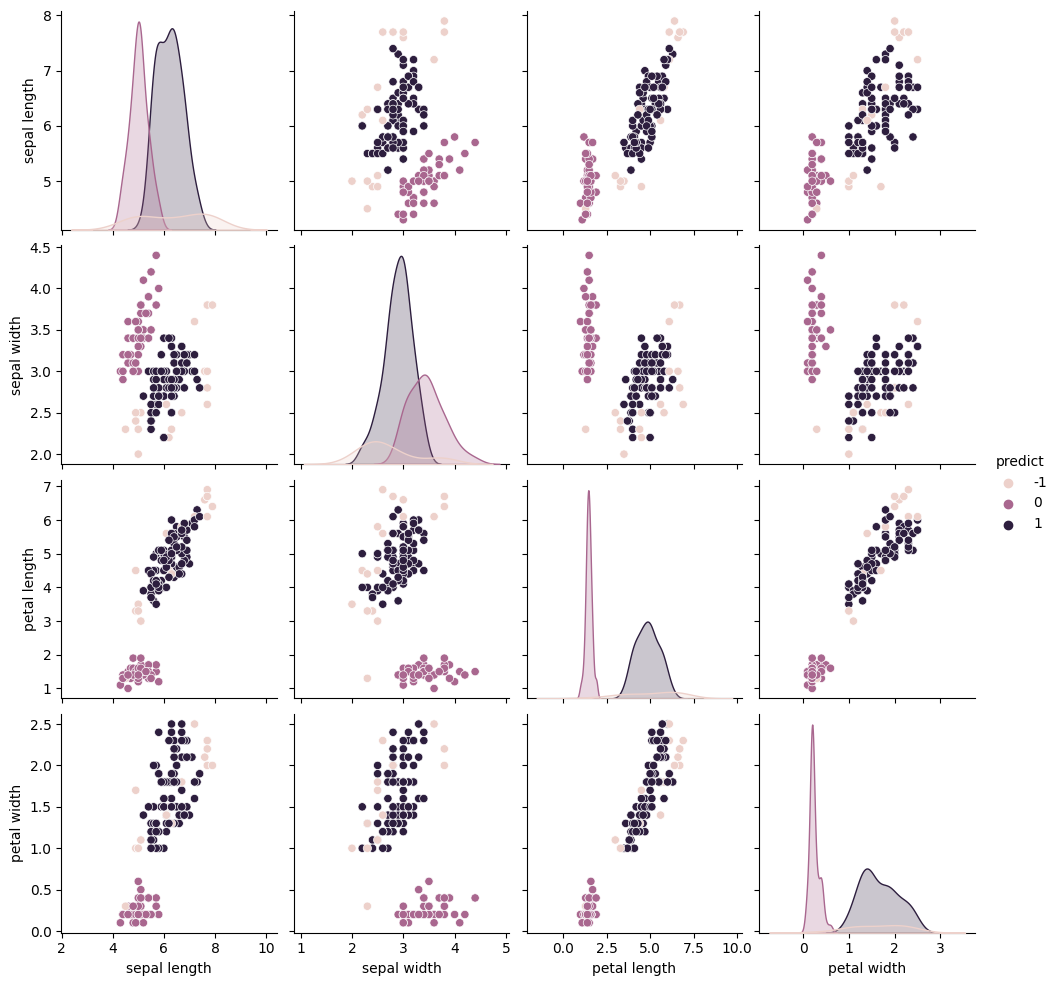

In [14]:
sns.pairplot(iris_pred, hue='predict')
plt.show()

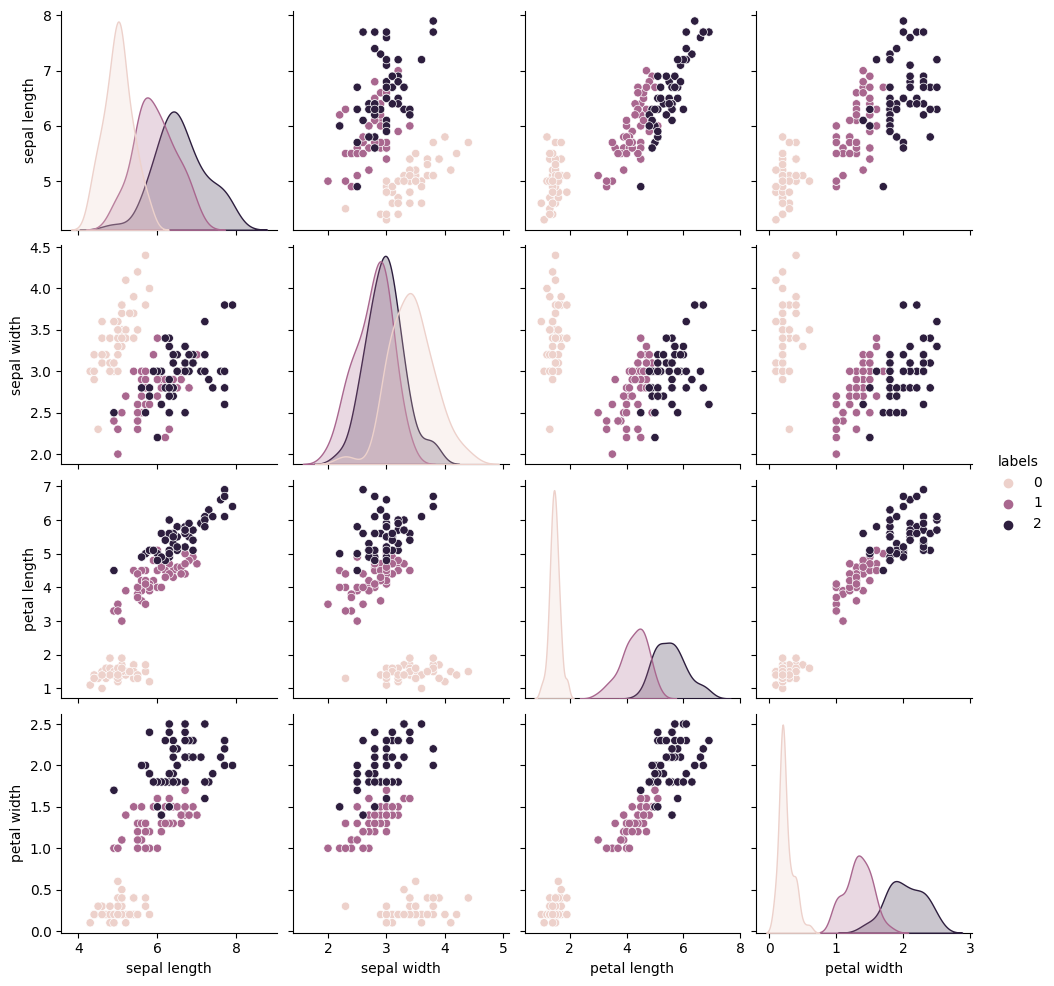

In [15]:
sns.pairplot(iris_df, hue='labels')
plt.show()

In [16]:
iris_df['predict'] = predict
iris_df.head()

,sepal length,sepal width,petal length,petal width,labels,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [17]:
iris_result = iris_df.groupby(['labels', 'predict'])['sepal length'].count()
iris_result

labels  predict
0       -1          1
         0         49
1       -1          6
         1         44
2       -1         10
         1         40
Name: sepal length, dtype: int64